# Dataset Creation

In [1]:
# Importing libraries
import os
import pandas as pd
import matplotlib.pyplot as plt

### Combine all files and get events and counts

In [2]:
# Directory path containing event CSV files
directory_path = r'D:\Masters\3rd_semester\Industry_4_0\Code\events'

# Initialize an empty DataFrame to store the combined data
combined_data = pd.DataFrame()

# Initialize an empty DataFrame to store unique event counts per case
events_df = pd.DataFrame(columns=['Case_Id', 'Events', 'Unique_Count'])

# Get the list of all files in the directory
files = [f for f in os.listdir(directory_path) if f.endswith('.csv')]

# Loop through each CSV file and append its data to the combined DataFrame
for file in files:
    file_path = os.path.join(directory_path, file)
    df = pd.read_csv(file_path)
    combined_data = combined_data.append(df, ignore_index=True)
    # Sort the DataFrame by timestamp
    df = df.sort_values(by='Timestamp')
    
        
    # Iterate over each group of Case_Id and calculate unique event counts
    for case_id, group in df.groupby('Case_Id'):
        events = group['Event']
        events_df = events_df.append({'Case_Id': case_id, 'Events': ','.join(map(str,events)), 'Unique_Count': events.nunique()}, ignore_index=True)
            
        
        
event_counts = combined_data.groupby(['Case_Id', 'Event']).size().reset_index(name='Count')    

In [3]:
event_counts.head()

,Case_Id,Event,Count
0,0,2,514
1,0,19,125
2,0,25,29
3,0,35,8
4,0,44,1


In [4]:
events_df.head()

,Case_Id,Events,Unique_Count
0,11,"328,328,328,206,328,414,55,572,268,328,206,328...",91
1,205,"572,184,572,597,184,597,328,434,434,206,206,57...",90
2,246,"260,265,64,166,317,317,381,25,560,240,298,280,...",91
3,261,"603,597,597,184,572,184,597,572,184,597,184,18...",99
4,315,"71,71,71,572,572,268,260,64,597,184,328,206,32...",74


In [5]:
# Group the event counts by Case_Id to count unique events per case
unique_event_counts = event_counts.groupby(['Case_Id']).size().reset_index(name='Count')
print(unique_event_counts)

      Case_Id  Count
0           0     98
1           1     75
2           2     94
3           4    102
4           5    120
...       ...    ...
5766     7398    105
5767     7401     73
5768     7402     96
5769     7403     82
5770     7405     70

[5771 rows x 2 columns]


In [6]:
# Group the event counts by Case_Id to sum all occurrences of events per case
all_event_counts = event_counts.groupby('Case_Id')['Count'].sum().reset_index()
print(all_event_counts)

      Case_Id  Count
0           0  42865
1           1  37100
2           2  51459
3           4  27168
4           5   9240
...       ...    ...
5766     7398  15243
5767     7401  19925
5768     7402  27219
5769     7403  13841
5770     7405   9620

[5771 rows x 2 columns]


In [7]:
# Group the event counts by Event to count occurrence of each event across all cases
each_event_case_id_counts = event_counts.groupby(['Event']).size().reset_index(name='Count')
print(each_event_case_id_counts)

     Event  Count
0        0      3
1        1      6
2        2   5752
3        3      3
4        4     32
..     ...    ...
576    600      6
577    601    126
578    602     26
579    603   2480
580    604     15

[581 rows x 2 columns]


### Remove cases for which events are not given

In [8]:
# Read the cases (tickets) from the main csv file
tickets = pd.read_csv('tickets.csv')

# Filter cases with events
available_tickets = tickets[tickets['Case_Id'].isin(unique_event_counts['Case_Id'])]

In [9]:
available_tickets.describe()

,Case_Id,Onsite
count,5771.000000,5771.000000
mean,3617.645122,0.525039
std,2140.444481,0.499416
min,0.000000,0.000000
25%,1773.000000,0.000000
50%,3538.000000,1.000000
75%,5469.000000,1.000000
max,7405.000000,1.000000


In [10]:
available_tickets.head()

,Case_Id,Machine_Id,Onsite,Start_Time,End_Time
0,0.0,Machine_0,1.0,2014-12-21 10:54:31+00:00,2014-12-23 23:14:34+00:00
1,1.0,Machine_1,1.0,2016-05-05 07:21:48+00:00,2016-09-23 04:47:57+00:00
2,2.0,Machine_2,1.0,2016-07-17 12:38:41+00:00,2016-07-19 04:13:16+00:00
4,4.0,Machine_4,1.0,2015-11-07 08:25:12+00:00,2015-11-14 02:24:16+00:00
5,5.0,Machine_5,1.0,2015-06-29 09:44:09+00:00,2015-07-30 23:33:11+00:00


In [11]:
available_tickets['Onsite'].value_counts()

1.0    3030
0.0    2741
Name: Onsite, dtype: int64

### Remove events and cases 

In [12]:
events_df.head()

,Case_Id,Events,Unique_Count
0,11,"328,328,328,206,328,414,55,572,268,328,206,328...",91
1,205,"572,184,572,597,184,597,328,434,434,206,206,57...",90
2,246,"260,265,64,166,317,317,381,25,560,240,298,280,...",91
3,261,"603,597,597,184,572,184,597,572,184,597,184,18...",99
4,315,"71,71,71,572,572,268,260,64,597,184,328,206,32...",74


In [13]:
# Split the "Events" column to get individual events and count occurrences
event_map = {}

# Iterate through rows and populate the event_map dictionary
for index, row in events_df.iterrows():
    case_id = row['Case_Id']
    events = set(row['Events'].split(','))
    for event in events:
        event_map[event] = event_map.get(event, 0) + 1

print(event_map)

# Convert the event_map to a DataFrame
event_count_per_case = pd.DataFrame(list(event_map.items()), columns=['Event', 'Case_Id_Count'])

{'293': 265, '71': 4954, '425': 3956, '326': 5754, '435': 5236, '419': 5631, '555': 5228, '224': 418, '230': 5743, '98': 3620, '484': 3492, '589': 5757, '338': 5416, '55': 5723, '207': 5735, '93': 5716, '182': 5598, '588': 5739, '458': 368, '268': 5749, '303': 580, '375': 877, '552': 5219, '369': 5754, '232': 3395, '434': 5762, '260': 5757, '30': 1242, '306': 4089, '19': 5755, '269': 5755, '506': 4987, '498': 4549, '492': 5746, '77': 812, '65': 1227, '254': 1067, '280': 5737, '240': 5744, '562': 5749, '75': 5756, '237': 5754, '298': 5745, '414': 5724, '166': 5745, '304': 5310, '211': 5475, '317': 5721, '149': 425, '25': 5751, '328': 5762, '138': 900, '94': 4221, '385': 1067, '228': 5758, '597': 5754, '194': 4219, '130': 1484, '163': 1783, '572': 5747, '279': 725, '560': 5686, '81': 356, '546': 377, '2': 5749, '583': 4661, '66': 5310, '203': 5757, '206': 5763, '538': 5739, '437': 5571, '116': 5750, '129': 5737, '221': 5749, '220': 4288, '381': 5751, '463': 5739, '382': 5709, '184': 5742

In [14]:
event_count_per_case.head()

,Event,Case_Id_Count
0,293,265
1,71,4954
2,425,3956
3,326,5754
4,435,5236


In [15]:
event_count_per_case.describe()

,Case_Id_Count
count,563.000000
mean,921.428064
std,1795.778208
min,1.000000
25%,7.000000
50%,53.000000
75%,577.000000
max,5763.000000


Initial Number of Events: 563


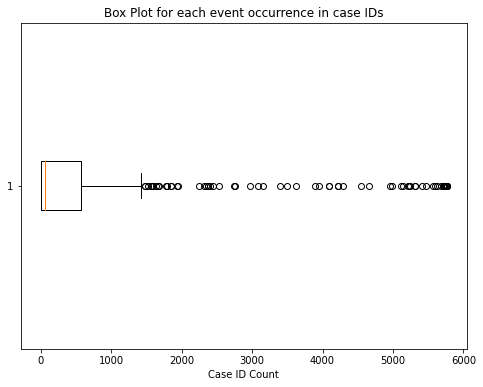

In [16]:
# Get the initial number of events
initial_events_count = event_count_per_case.shape[0]
print(f"Initial Number of Events: {initial_events_count}")

# Plot the number of Case_Ids each event is present in
plt.figure(figsize=(8, 6))
plt.boxplot(event_count_per_case['Case_Id_Count'], vert=False)
plt.title('Box Plot for each event occurrence in case IDs')
plt.xlabel('Case ID Count')
plt.show()

In [17]:
# Choose the desired quantiles i.e. 25th and 75th percentiles
lower_quantile = event_count_per_case['Case_Id_Count'].quantile(0.25)
upper_quantile = event_count_per_case['Case_Id_Count'].quantile(0.75)

# Calculate the interquartile range (IQR)
iqr = upper_quantile - lower_quantile

# Calculate lower and upper bounds for outliers
lower_bound = lower_quantile - 1.5 * iqr
upper_bound = upper_quantile + 1.5 * iqr
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

# Events present in less than the 20 or more than the 2500 are considered outliers
outliers = event_count_per_case[(event_count_per_case['Case_Id_Count'] < 20) | (event_count_per_case['Case_Id_Count'] > 2500)]

# Count of outliers
outliers_count = outliers.shape[0]

# Case_Id values for outliers
outlier_events = outliers['Event'].tolist()

print(f"Number of outliers: {outliers_count}")
print("Events to be removed:")
print(outlier_events)

Lower Bound: -848.0
Upper Bound: 1432.0
Number of outliers: 285
Events to be removed:
[382, 220, 201, 206, 232, 419, 583, 552, 2, 98, 71, 280, 182, 562, 228, 306, 484, 414, 398, 203, 207, 34, 326, 369, 93, 240, 463, 269, 498, 194, 597, 572, 589, 184, 129, 492, 555, 328, 186, 317, 506, 469, 412, 560, 64, 304, 435, 434, 116, 94, 298, 221, 66, 538, 425, 268, 19, 437, 211, 381, 55, 166, 75, 514, 25, 338, 230, 103, 260, 237, 588, 516, 251, 46, 54, 288, 521, 35, 272, 449, 157, 476, 315, 311, 544, 366, 415, 378, 422, 403, 7, 343, 83, 493, 452, 439, 487, 391, 322, 217, 208, 309, 507, 248, 420, 74, 136, 50, 470, 235, 263, 388, 357, 404, 241, 11, 456, 393, 387, 57, 480, 604, 233, 519, 168, 0, 436, 407, 215, 275, 101, 474, 502, 318, 287, 37, 80, 84, 592, 508, 59, 14, 565, 335, 72, 537, 509, 278, 213, 595, 249, 367, 128, 566, 600, 591, 197, 257, 520, 533, 373, 462, 222, 351, 209, 13, 61, 174, 332, 408, 586, 399, 28, 383, 193, 496, 301, 49, 36, 20, 258, 433, 124, 204, 485, 181, 170, 92, 67, 188, 21

In [18]:
# Initialize an empty DataFrame to store events without outliers
Events_removed = pd.DataFrame(columns=['Case_Id', 'Events_removed', 'Unique_Count'])

# Iterate through rows and populate the new DataFrame without outliers
for index, row in events_df.iterrows():
    case_id = row['Case_Id']
    events = [event for event in row['Events'].split(',') if event not in outlier_events]
    Events_removed = Events_removed.append({'Case_Id': case_id, 'Events_removed': ','.join(map(str, events)), 
                                            'Unique_Count': len(set(events))}, ignore_index=True)

In [19]:
Events_removed.head()

,Case_Id,Events_removed,Unique_Count
0,11,"328,328,328,206,328,414,55,572,268,328,206,328...",91
1,205,"572,184,572,597,184,597,328,434,434,206,206,57...",90
2,246,"260,265,64,166,317,317,381,25,560,240,298,280,...",91
3,261,"603,597,597,184,572,184,597,572,184,597,184,18...",99
4,315,"71,71,71,572,572,268,260,64,597,184,328,206,32...",74


Initial Number of Case_ID values: 5771


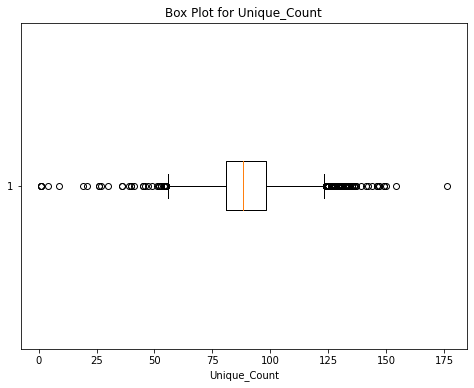

In [20]:
# Get the initial number of Case_Id values
initial_case_ids_count = Events_removed.shape[0]
print(f"Initial Number of Case_ID values: {initial_case_ids_count}")

# Plot the number of unique events in each Case_Id
plt.figure(figsize=(8, 6))
plt.boxplot(Events_removed['Unique_Count'], vert=False)
plt.title('Box Plot for Unique_Count')
plt.xlabel('Unique_Count')
plt.show()

In [21]:
# Case_Ids with less than 25 and more than 150 unique events are considered outliers
outliers = Events_removed[(Events_removed['Unique_Count'] < 25) | (Events_removed['Unique_Count'] > 150)]

# Count of outliers
outliers_count = outliers.shape[0]

# Case_Ids of outliers
outlier_case_ids = outliers['Case_Id'].tolist()

print(f"Number of outliers: {outliers_count}")
print("Case IDs to be removed:")
print(outlier_case_ids)

Number of outliers: 10
Case IDs to be removed:
[4535, 510, 3203, 7282, 1392, 5760, 3799, 4783, 4044, 6407]


In [22]:
# Remove outliers from Events_removed DataFrame
df2 = Events_removed[~Events_removed['Case_Id'].isin(outlier_case_ids)].sort_values(by='Case_Id')
df2.head()

,Case_Id,Events_removed,Unique_Count
1688,0,"66,304,66,304,66,304,572,597,328,206,434,206,3...",82
4574,1,"328,206,206,328,328,328,562,572,572,572,572,26...",75
5073,2,"328,206,434,206,414,328,492,528,516,206,55,64,...",81
3481,4,"64,166,527,119,317,317,240,298,599,129,280,260...",100
2637,5,"603,177,603,64,468,55,481,250,327,146,176,205,...",120


In [23]:
# Remove outliers from the available_tickets DataFrame
available_tickets = available_tickets[~available_tickets['Case_Id'].isin(outlier_case_ids)].sort_values(by='Case_Id')
available_tickets.head()

,Case_Id,Machine_Id,Onsite,Start_Time,End_Time
0,0.0,Machine_0,1.0,2014-12-21 10:54:31+00:00,2014-12-23 23:14:34+00:00
1,1.0,Machine_1,1.0,2016-05-05 07:21:48+00:00,2016-09-23 04:47:57+00:00
2,2.0,Machine_2,1.0,2016-07-17 12:38:41+00:00,2016-07-19 04:13:16+00:00
4,4.0,Machine_4,1.0,2015-11-07 08:25:12+00:00,2015-11-14 02:24:16+00:00
5,5.0,Machine_5,1.0,2015-06-29 09:44:09+00:00,2015-07-30 23:33:11+00:00


In [24]:
# Merge df2 and available_tickets DataFrames on 'Case_Id'
final_df = pd.merge(df2, available_tickets, on='Case_Id')

final_df.head()

,Case_Id,Events_removed,Unique_Count,Machine_Id,Onsite,Start_Time,End_Time
0,0,"66,304,66,304,66,304,572,597,328,206,434,206,3...",82,Machine_0,1.0,2014-12-21 10:54:31+00:00,2014-12-23 23:14:34+00:00
1,1,"328,206,206,328,328,328,562,572,572,572,572,26...",75,Machine_1,1.0,2016-05-05 07:21:48+00:00,2016-09-23 04:47:57+00:00
2,2,"328,206,434,206,414,328,492,528,516,206,55,64,...",81,Machine_2,1.0,2016-07-17 12:38:41+00:00,2016-07-19 04:13:16+00:00
3,4,"64,166,527,119,317,317,240,298,599,129,280,260...",100,Machine_4,1.0,2015-11-07 08:25:12+00:00,2015-11-14 02:24:16+00:00
4,5,"603,177,603,64,468,55,481,250,327,146,176,205,...",120,Machine_5,1.0,2015-06-29 09:44:09+00:00,2015-07-30 23:33:11+00:00


### Get last 8000 events

In [25]:
# Split the 'Events_removed' column into lists of events
final_df['Events_removed_List'] = final_df['Events_removed'].str.split(',')

# Take only last 8000 events
final_df['Events_removed_List'] = final_df['Events_removed_List'].apply(lambda x: x[:8000])

# Combine last 8000 events from the 'Events_removed_List' column into a string
final_df['Events_removed'] = final_df['Events_removed_List'].apply(lambda x: ','.join(x))

# Add a column for the number of events
final_df['No of events'] = final_df['Events_removed_List'].apply(len)

final_df.head()

,Case_Id,Events_removed,Unique_Count,Machine_Id,Onsite,Start_Time,End_Time,Events_removed_List,No of events
0,0,"328,328,328,562,328,328,328,572,597,597,184,57...",82,Machine_0,1.0,2014-12-21 10:54:31+00:00,2014-12-23 23:14:34+00:00,"[328, 328, 328, 562, 328, 328, 328, 572, 597, ...",8000
1,1,"437,93,338,2,203,326,206,369,186,228,572,597,2...",75,Machine_1,1.0,2016-05-05 07:21:48+00:00,2016-09-23 04:47:57+00:00,"[437, 93, 338, 2, 203, 326, 206, 369, 186, 228...",8000
2,2,"328,206,434,328,206,328,382,572,206,328,382,18...",81,Machine_2,1.0,2016-07-17 12:38:41+00:00,2016-07-19 04:13:16+00:00,"[328, 206, 434, 328, 206, 328, 382, 572, 206, ...",8000
3,4,"369,228,186,562,268,206,206,328,206,206,328,32...",100,Machine_4,1.0,2015-11-07 08:25:12+00:00,2015-11-14 02:24:16+00:00,"[369, 228, 186, 562, 268, 206, 206, 328, 206, ...",8000
4,5,"597,597,184,184,184,597,184,184,597,597,184,59...",120,Machine_5,1.0,2015-06-29 09:44:09+00:00,2015-07-30 23:33:11+00:00,"[597, 597, 184, 184, 184, 597, 184, 184, 597, ...",8000


In [26]:
final_df['No of events'].describe()

count    5761.000000
mean     7805.153966
std       894.988793
min        72.000000
25%      8000.000000
50%      8000.000000
75%      8000.000000
max      8000.000000
Name: No of events, dtype: float64

In [27]:
# Filter case IDs with at least 8000 events
filtered_df = final_df[final_df['No of events'] >= 8000]

# Drop the 'Events_removed_List' column
filtered_df = filtered_df.drop(columns=['Events_removed_List'])

filtered_df.describe()

,Onsite,No of events
count,5385.000000,5385.0
mean,0.532405,8000.0
std,0.498995,0.0
min,0.000000,8000.0
25%,0.000000,8000.0
50%,1.000000,8000.0
75%,1.000000,8000.0
max,1.000000,8000.0


### Train - Test - Validation split

In [28]:
# Read machine IDs for training, validation, and test sets from Excel file
train_machine_ids = pd.read_excel('DatasetPlanning.xlsx', sheet_name='Train')['Machine_Id'].unique()
validate_machine_ids = pd.read_excel('DatasetPlanning.xlsx', sheet_name='Validate')['Machine_Id'].unique()
test_machine_ids = pd.read_excel('DatasetPlanning.xlsx', sheet_name='Test')['Machine_Id'].unique()

# Filter DataFrames based on machine IDs for each set
traindf = filtered_df[filtered_df['Machine_Id'].isin(train_machine_ids)]
valdf = filtered_df[filtered_df['Machine_Id'].isin(validate_machine_ids)]
testdf = filtered_df[filtered_df['Machine_Id'].isin(test_machine_ids)]

In [29]:
traindf.head()

,Case_Id,Events_removed,Unique_Count,Machine_Id,Onsite,Start_Time,End_Time,No of events
0,0,"328,328,328,562,328,328,328,572,597,597,184,57...",82,Machine_0,1.0,2014-12-21 10:54:31+00:00,2014-12-23 23:14:34+00:00,8000
1,1,"437,93,338,2,203,326,206,369,186,228,572,597,2...",75,Machine_1,1.0,2016-05-05 07:21:48+00:00,2016-09-23 04:47:57+00:00,8000
2,2,"328,206,434,328,206,328,382,572,206,328,382,18...",81,Machine_2,1.0,2016-07-17 12:38:41+00:00,2016-07-19 04:13:16+00:00,8000
3,4,"369,228,186,562,268,206,206,328,206,206,328,32...",100,Machine_4,1.0,2015-11-07 08:25:12+00:00,2015-11-14 02:24:16+00:00,8000
9,10,"237,228,269,75,203,237,269,228,75,237,203,269,...",105,Machine_10,1.0,2013-11-20 12:58:10+00:00,2013-12-15 21:34:39+00:00,8000


In [30]:
traindf.describe()

,Onsite,No of events
count,2823.000000,2823.0
mean,0.553312,8000.0
std,0.497238,0.0
min,0.000000,8000.0
25%,0.000000,8000.0
50%,1.000000,8000.0
75%,1.000000,8000.0
max,1.000000,8000.0


In [31]:
valdf.head()

,Case_Id,Events_removed,Unique_Count,Machine_Id,Onsite,Start_Time,End_Time,No of events
5,6,"572,206,211,93,498,221,326,203,116,369,186,228...",96,Machine_6,1.0,2016-01-24 03:00:55+00:00,2016-01-31 23:23:50+00:00,8000
6,7,"228,186,597,572,206,338,75,338,326,203,116,369...",91,Machine_7,1.0,2015-03-29 09:28:14+00:00,2015-04-22 00:09:00+00:00,8000
45,53,"326,228,186,369,260,562,64,184,268,184,597,206...",86,Machine_50,1.0,2015-09-17 16:11:55+00:00,2015-09-21 00:09:38+00:00,8000
46,54,"464,93,203,338,2,326,206,369,228,186,572,597,4...",96,Machine_51,1.0,2015-09-08 06:53:16+00:00,2015-09-15 03:35:23+00:00,8000
47,55,"562,572,572,328,206,434,382,328,206,434,328,20...",101,Machine_52,1.0,2016-06-07 10:50:49+00:00,2016-06-09 02:03:26+00:00,8000


In [32]:
valdf.describe()

,Onsite,No of events
count,934.000000,934.0
mean,0.570664,8000.0
std,0.495247,0.0
min,0.000000,8000.0
25%,0.000000,8000.0
50%,1.000000,8000.0
75%,1.000000,8000.0
max,1.000000,8000.0


In [33]:
testdf.head()

,Case_Id,Events_removed,Unique_Count,Machine_Id,Onsite,Start_Time,End_Time,No of events
8,9,"464,237,203,269,228,75,464,237,203,228,269,75,...",83,Machine_9,1.0,2014-12-09 08:16:47+00:00,2014-12-16 22:59:13+00:00,8000
28,32,"184,597,184,328,206,434,206,328,382,206,597,59...",87,Machine_31,1.0,2016-07-28 06:06:10+00:00,2016-08-02 03:41:22+00:00,8000
64,76,"206,540,328,434,419,338,206,597,437,93,203,326...",93,Machine_72,1.0,2016-08-10 11:27:22+00:00,2016-08-18 03:15:07+00:00,8000
65,77,"184,572,597,184,268,328,206,232,434,597,382,33...",97,Machine_73,1.0,2013-12-07 02:46:15+00:00,2014-01-05 21:48:31+00:00,8000
66,79,"203,237,269,228,75,237,203,269,228,75,203,237,...",113,Machine_75,1.0,2016-06-22 13:19:16+00:00,2016-06-24 02:58:47+00:00,8000


In [34]:
testdf.describe()

,Onsite,No of events
count,945.000000,945.0
mean,0.500529,8000.0
std,0.500264,0.0
min,0.000000,8000.0
25%,0.000000,8000.0
50%,1.000000,8000.0
75%,1.000000,8000.0
max,1.000000,8000.0


In [35]:
# Save final train, validation, and test dataset
traindf.to_hdf("train.h5", key='data', mode='w', index=False)
valdf.to_hdf("validation.h5", key='data', mode='w', index=False)
testdf.to_hdf("test.h5", key='data', mode='w', index=False)